Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [2]:
%%bash
cd ../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 11%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 27%] Built target chaste_ode
[ 44%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
Scanning dependencies of target MesenchymalCondensationSimulation
[100%] Building CXX object projects/cartilage/apps/CMakeFiles/MesenchymalCondensationSimulation.dir/src/MesenchymalCondensationSimulation.cpp.o
[100%] Linking CXX executable MesenchymalCondensationSimulation
[100%] Built target MesenchymalCondensationSimulation


In [3]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
output_directory = 'exp-draft/mesenchymal_condensation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 100.0' # final time 100h
flags = flags + ' --sw 10' # 10 cells in x direction
flags = flags + ' --sd 20' # 20 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 0.75' # 75% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 3.5' # set distance between boundaries to 3.5
flags = flags + ' --psl 4' # patch size limit set to 4
flags = flags + ' --g1t 10.0' # g1 phase duration for transit cells set to 30 hours (exponentially distributed)
flags = flags + ' --ds 3.0' # s phase duration for all cells set to 10 hours (fixed)
flags = flags + ' --sc 1.05' # scale the initial configuration in x-y direction
#flags = flags + ' --dt 0.004' # half the default time step


flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation'

In [8]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 1 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 2 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartil

In [9]:
de.run_postprocessing_multiple_random_seeds(8, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-150604/7/result

# A repulsion only force and oriented cell division enable column growth

## Data:
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-144756/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd

## Average patch projection area

Text(0,0.5,'Average patch projection area')

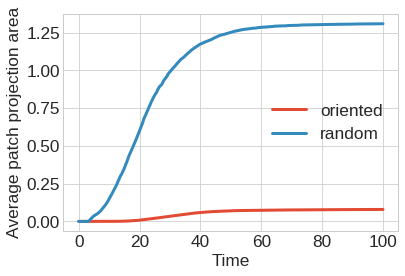

In [11]:
dir_directed = 'exp-draft/mesenchymal_condensation/20200429-144756/'
dir_random = 'exp-draft/mesenchymal_condensation/20200429-150604/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /8


plt.plot(times_d, ppa_av_d, label='oriented')
plt.plot(times_r, ppa_av_r, label='random')
plt.legend()
#plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

## Simulation snapshots
Note that these were not generated by the paraview script but manually, because right now I need to make some adjustments to the script.

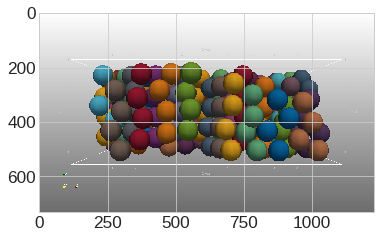

In [16]:
image = mpimg.imread("/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-144756/2/cut_through_condensation_along_y_axis.png")
plt.imshow(image)

In [13]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/20200429-144756/0/ -t 1000

No path to input provided via -i flag. Using default.


Traceback (most recent call last):
  File "analysis/paraview_show_clonal_patches.py", line 204, in <module>
    screenshot(sys.argv[1:])    
  File "analysis/paraview_show_clonal_patches.py", line 15, in screenshot
    for opt, arg in opts:
UnboundLocalError: local variable 'opts' referenced before assignment


# Space is needed to initially grow columns

This refers to the scaling of the initial condition. What about the heterogeneity in the z-direction? Is this still important for a scaled sheet?

# Order in the columns can only be maintained until a certain thickness of the sheet

# It is more efficient to keep order by increasing column size than to grow larger columns from scratch